In [11]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# read in already combined coaches data and create data frame
coaches = pd.read_csv("Coaches.csv")


# print the first five rows of the data frame
print(pd.DataFrame.head(coaches))
coachesDF = pd.DataFrame(coaches)

coachesDF

coachesDF = coachesDF.set_index("School")
coachesDF = coachesDF.drop("Army", axis=0)
coachesDF = coachesDF.drop("Brigham Young", axis=0)
coachesDF = coachesDF.drop("Liberty", axis=0)
coachesDF = coachesDF.drop("Miami", axis=0)
coachesDF = coachesDF.drop("Rice", axis=0)
coachesDF = coachesDF.drop("Southern Methodist", axis=0)
coachesDF = coachesDF.drop("Temple", axis=0)
coachesDF = coachesDF.drop("Baylor", axis=0)

                  School Type Conference              Coach  SchoolPay  \
0              Air Force   G5   Mt. West       Troy Calhoun    1800000   
1                  Akron   G5        MAC           Tom Arth     500000   
2                Alabama   P5        SEC         Nick Saban    8707000   
3  Alabama at Birmingham   G5      C-USA         Bill Clark    1450000   
4      Appalachian State   G5   Sun Belt  Scott Satterfield    3250000   

   TotalPay    Bonus  BonusPaid  AssistantPay    Buyout  ...  AvgTemp  \
0         0        0          0             0         0  ...     54.8   
1    500000   120000          0        963000   1275000  ...     61.4   
2   8857000  1100000     875000       7541277  34100000  ...     77.0   
3   1450000  1060000     228105       1270250   7012500  ...     74.4   
4   3250000   975000          0       3820000  12390625  ...     62.2   

   TotalRevenue  TicketSales  Contributions  Rights/Licensing  StudentFees  \
0      60101907      3579247        42

In [12]:
## Exploratory Analysis

coachesDF.shape #shape of my dataframe

coachesDF.dtypes #types of data in my dataframe

coachesDF.info() #quick overview of dataset

coachesDF.describe() #statistical summary about dataset


<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, Air Force to Wyoming
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              122 non-null    object 
 1   Conference        122 non-null    object 
 2   Coach             122 non-null    object 
 3   SchoolPay         122 non-null    int64  
 4   TotalPay          122 non-null    int64  
 5   Bonus             122 non-null    int64  
 6   BonusPaid         122 non-null    int64  
 7   AssistantPay      122 non-null    int64  
 8   Buyout            122 non-null    int64  
 9   Wins              122 non-null    int64  
 10  Losses            122 non-null    int64  
 11  Record            122 non-null    float64
 12  PF                122 non-null    int64  
 13  PA                122 non-null    int64  
 14  Differential      122 non-null    int64  
 15  Latitude          122 non-null    float64
 16  Longitude         122 non-null    flo

,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Wins,Losses,Record,PF,...,AvgTemp,TotalRevenue,TicketSales,Contributions,Rights/Licensing,StudentFees,SchoolFunds,OtherIncome,GSR,FGR
count,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,122.000000,122.000000,122.000000,122.000000,...,122.000000,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.080000e+02,1.080000e+02,1.080000e+02,122.00000,122.000000
mean,2.701114e+06,2.694847e+06,8.255132e+05,1.157332e+05,2.643813e+06,7.558010e+06,6.778689,5.991803,0.519934,368.893443,...,69.259016,7.193700e+07,1.250320e+07,1.399651e+07,2.928794e+07,5.669853e+06,9.515689e+06,5.951015e+06,78.95082,61.106557
std,1.988690e+06,2.008718e+06,7.101298e+05,2.284783e+05,2.006822e+06,9.862394e+06,3.171444,2.530789,0.219512,105.971757,...,7.917663,5.470461e+07,1.465730e+07,1.505938e+07,2.930290e+07,6.529155e+06,9.381230e+06,5.607167e+06,8.75172,14.606014
min,3.600000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,126.000000,...,54.200000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.271338e+06,54.00000,0.000000
25%,8.232675e+05,8.059350e+05,3.362500e+05,0.000000e+00,1.109209e+06,8.626512e+05,4.000000,5.000000,0.333000,303.000000,...,62.450000,3.259678e+07,1.257576e+06,2.620490e+06,4.083215e+06,0.000000e+00,1.426769e+06,2.489002e+06,73.00000,55.000000
50%,2.308000e+06,2.348000e+06,7.390510e+05,2.088200e+04,1.974938e+06,3.090632e+06,7.000000,6.000000,0.538000,364.000000,...,69.000000,5.060252e+07,6.087546e+06,7.311698e+06,1.173951e+07,3.429872e+06,7.429998e+06,3.971433e+06,79.00000,62.000000
75%,3.822000e+06,3.822000e+06,1.118750e+06,1.187500e+05,3.981250e+06,1.160646e+07,8.750000,8.000000,0.636000,430.000000,...,75.150000,1.071591e+08,1.979625e+07,2.342820e+07,5.492094e+07,8.811602e+06,1.534492e+07,7.728456e+06,85.75000,69.000000
max,9.255000e+06,9.315600e+06,3.967500e+06,1.265000e+06,7.541277e+06,6.062500e+07,15.000000,12.000000,1.000000,726.000000,...,86.000000,2.194026e+08,6.708101e+07,8.542168e+07,9.444398e+07,2.878408e+07,4.044024e+07,3.354623e+07,100.00000,93.000000


In [13]:
#More Exploratory
coachesDF['SchoolPay'].min()
coachesDF['SchoolPay'].max()
coachesDF['SchoolPay'].mean()

coachesDF['GSR']=coachesDF['GSR'].astype('float')
coachesDF['FGR']=coachesDF['FGR'].astype('float')
coachesDF['Differential']=coachesDF['Differential'].astype('float')
coachesDF['Capacity']=coachesDF['Capacity'].astype('float')
coachesDF['SchoolPay']=coachesDF['SchoolPay'].astype('float')

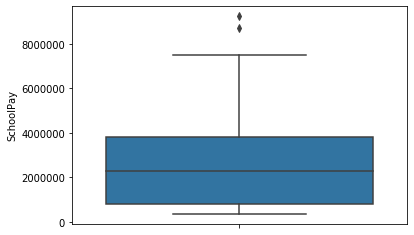

In [14]:
sns.boxplot(y="SchoolPay", data=coachesDF)


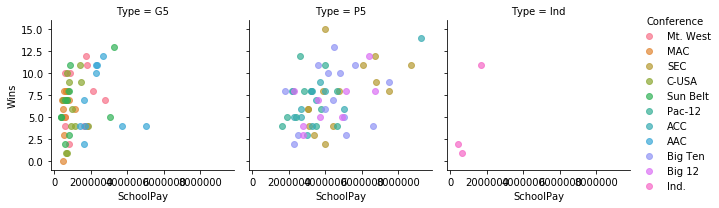

In [15]:

g = sns.FacetGrid(coachesDF, col="Type", hue="Conference",)
g.map(plt.scatter, "SchoolPay", "Wins", alpha=.7)
g.add_legend();
plt.show()

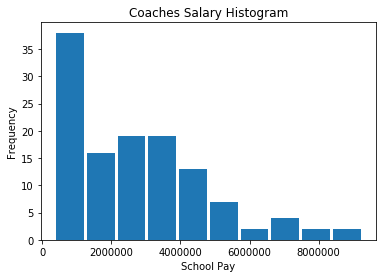

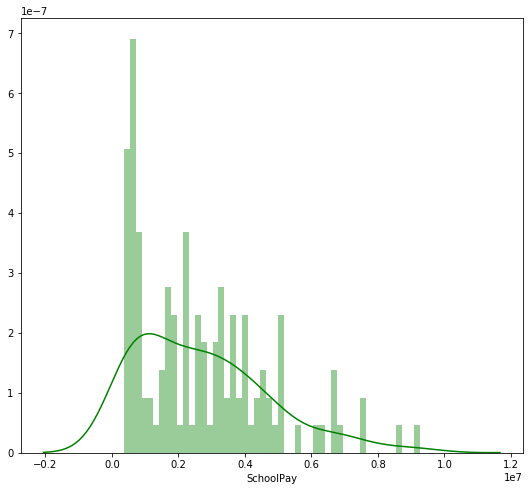

In [16]:
# Histrogram of salary distribution

plt.hist(coachesDF['SchoolPay'], density = False, stacked = False, rwidth = .9)
plt.title("Coaches Salary Histogram")
plt.xlabel('School Pay')
plt.ylabel('Frequency')

plt.show()

plt.figure(figsize=(9,8))
sns.distplot(coachesDF['SchoolPay'], color='g', bins=50, hist_kws={'alpha': 0.4});

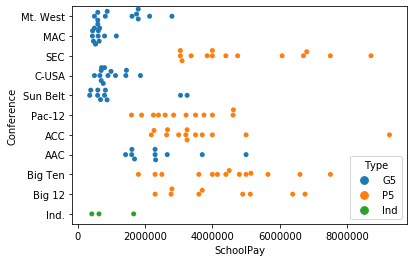

In [17]:
# School Pay by Conference and Type (P5, G%, Ind)

sns.swarmplot(x="SchoolPay", y="Conference", hue="Type", 
              data=coachesDF)
#g.add_legend();
plt.show()

In [18]:
# To find those features that have a strong correlation with SchoolPay,

coachesDFcorr = coachesDF.corr()['SchoolPay'][:-1]
matches = coachesDFcorr[abs(coachesDFcorr) > 0.60].sort_values(ascending=False)
print("There are {} strongly correlated values with SchoolPay:\n{}".format(len(matches),
                                                                          matches))




There are 10 strongly correlated values with SchoolPay:
SchoolPay           1.000000
TotalPay            0.996462
Capacity            0.775571
Buyout              0.767884
TicketSales         0.738704
AssistantPay        0.724128
Rights/Licensing    0.707415
TotalRevenue        0.706850
Contributions       0.681954
OtherIncome         0.639930
Name: SchoolPay, dtype: float64


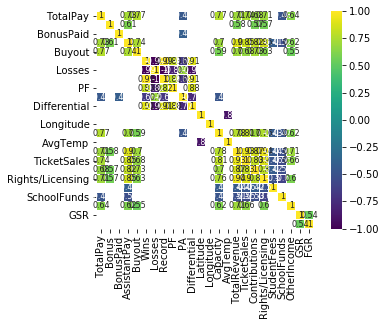

In [19]:
#plot a heatmap between these features

corr = coachesDF.drop('SchoolPay', axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
           cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={"size": 8}, square=True);









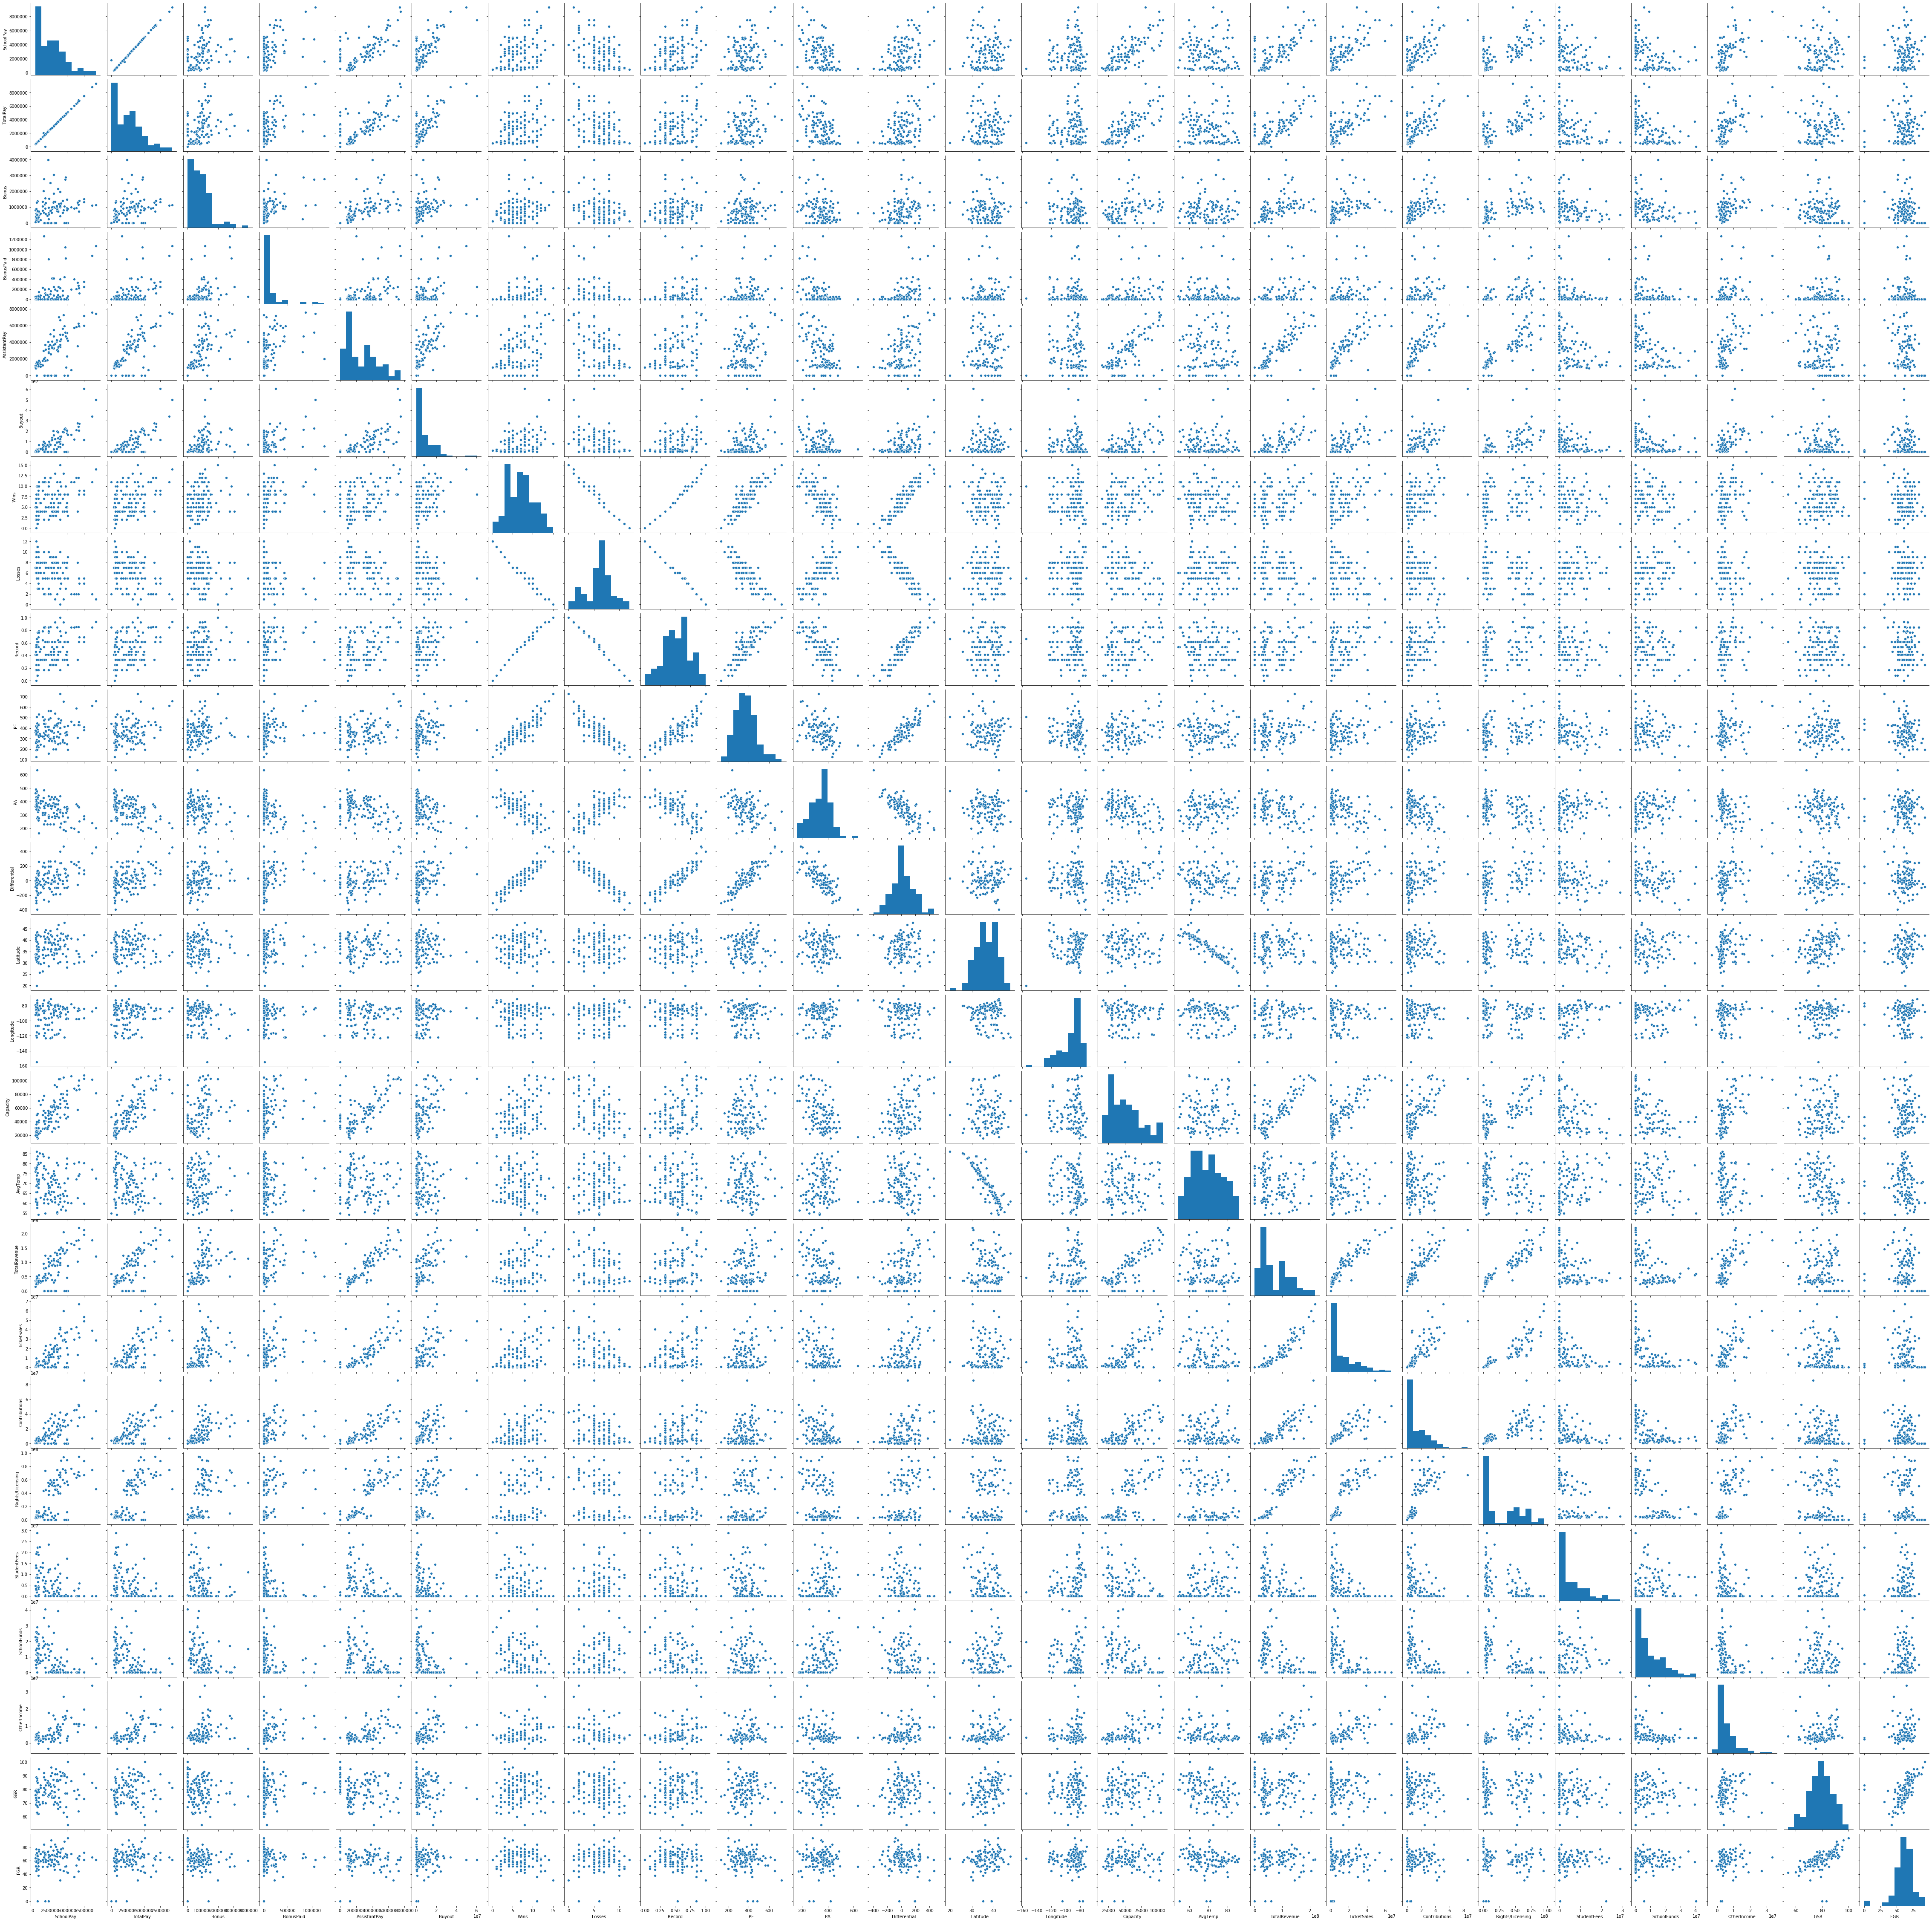

In [20]:
sns.pairplot(coachesDF)

In [21]:
#remove similar columns and useless columns
coachesDF = coachesDF.drop("TotalPay", axis=1)
coachesDF = coachesDF.drop("Bonus", axis=1)
coachesDF = coachesDF.drop("BonusPaid", axis=1)
coachesDF = coachesDF.drop("AssistantPay", axis=1)
coachesDF = coachesDF.drop("Buyout", axis=1)
coachesDF = coachesDF.drop("Wins", axis=1)
coachesDF = coachesDF.drop("Losses", axis=1)
coachesDF = coachesDF.drop("PF", axis=1)
coachesDF = coachesDF.drop("PA", axis=1)
coachesDF = coachesDF.drop("SchoolFunds", axis=1)
coachesDF = coachesDF.drop("OtherIncome", axis=1)
coachesDF = coachesDF.drop("StudentFees", axis=1)

In [22]:
#remove schools with no revenue reported
coachesDF = coachesDF.drop("Boston College", axis=0)
coachesDF = coachesDF.drop("Duke", axis=0)
coachesDF = coachesDF.drop("Navy", axis=0)
coachesDF = coachesDF.drop("Northwestern", axis=0)
coachesDF = coachesDF.drop("Notre Dame", axis=0)
coachesDF = coachesDF.drop("Pittsburgh", axis=0)
coachesDF = coachesDF.drop("Southern California", axis=0)
coachesDF = coachesDF.drop("Stanford", axis=0)
coachesDF = coachesDF.drop("Texas Christian", axis=0)
coachesDF = coachesDF.drop("Syracuse", axis=0)
coachesDF = coachesDF.drop("Tulane", axis=0)
coachesDF = coachesDF.drop("Tulsa", axis=0)
coachesDF = coachesDF.drop("Vanderbilt", axis=0)
coachesDF = coachesDF.drop("Wake Forest", axis=0)



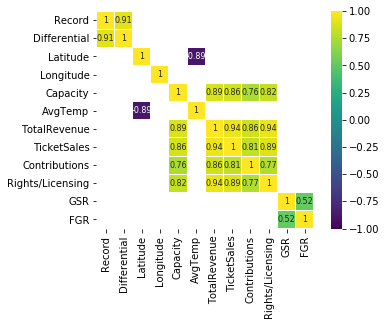

In [23]:
#replot heatmap
corr = coachesDF.drop('SchoolPay', axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
           cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={"size": 8}, square=True);

In [24]:
#building linear regression model

Y=coachesDF["SchoolPay"]
X=coachesDF[[ "Record", "Differential","Capacity","AvgTemp","TotalRevenue",
             "TicketSales","Contributions","Rights/Licensing","GSR","FGR"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465) 

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))


X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()











Training Data Count: 86
Testing Data Count: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SchoolPay   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     25.93
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           1.81e-20
Time:                        14:58:58   Log-Likelihood:                -1302.7
No. Observations:                  86   AIC:                             2627.
Df Residuals:                      75   BIC:                             2654.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              6.14e+05   2.07e+06      0.296      0.768   -3.51e+06    4.74e+06
Record           -1.807e+06   1.25e+06     -1.448      0.152   -4.29e+06    6.79e+05
Differential      2660.9611   1902.287      1.399      0.166   -1128.588    6450.510
Capacity            23.0855     10.179      2.268      0.026       2.809      43.362
AvgTemp          -4707.0391   1.68e+04     -0.280      0.780   -3.82e+04    2.88e+04
TotalRevenue         0.0117      0.010      1.201      0.234      -0.008       0.031
TicketSales         -0.0087      0.021     -0.423      0.673      -0.050       0.032
Contributions        0.0351      0.016      2.146      0.035       0.003       0.068
Rights/Licensing     0.0046      0.011      0.418      0.677      -0.017       0.027
GSR               9679.4799   1.75e+04      0.552      0.582   -2.52e+04    4.46e+04
FGR              -5505.2977   1.14e+04     -0.483      0.630   -2.82e+04    1.72e+04
==============================================================================
Omnibus:                       21.272   Durbin-Watson:                   2.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.782
Skew:                           1.103   Prob(JB):                     3.41e-07
Kurtosis:                       4.855   Cond. No.                     2.22e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#drop the insignifcant variabels from the model and try again

X2=coachesDF[[ "Capacity","Contributions"]]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size = 0.2, random_state = 465)

print('Training Data Count:', X2_train.shape[0])
print('Testing Data Count::', X2_test.shape[0])

X2_train = sm.add_constant(X2_train)

results2 = sm.OLS(y2_train, X2_train).fit()
results2.summary()

Training Data Count: 86
Testing Data Count:: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SchoolPay   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           1.52e-25
Time:                        14:59:03   Log-Likelihood:                -1307.7
No. Observations:                  86   AIC:                             2621.
Df Residuals:                      83   BIC:                             2629.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.184e+05   2.76e+05     -0.790      0.432   -7.68e+05    3.31e+05
Capacity         35.3756      7.138      4.956      0.000      21.178      49.573
Contributions     0.0575      0.011      5.186      0.000       0.035       0.080
==============================================================================
Omnibus:                       16.865   Durbin-Watson:                   2.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.573
Skew:                           0.971   Prob(JB):                     3.41e-05
Kurtosis:                       4.402   Cond. No.                     5.98e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

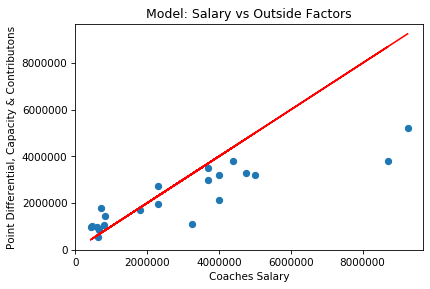

In [26]:
#plot my model

X2_test = sm.add_constant(X2_test)

y2_preds = results2.predict(X2_test)

plt.figure(dpi = 75)
plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("Coaches Salary")
plt.ylabel("Point Differential, Capacity & Contributons")
plt.title("Model: Salary vs Outside Factors")
plt.show()

In [27]:
#Making Big Ten and G5 Segments
B1G = coachesDF[coachesDF['Conference'] == 'Big Ten'].groupby('School').sum()
G5 = coachesDF[coachesDF['Type'] == 'G5'].groupby('School').sum()

In [28]:
#G5 Model


G5Y=G5["SchoolPay"]
G5X=G5[[ "Record", "Differential","Capacity","AvgTemp","TotalRevenue",
             "TicketSales","Contributions","Rights/Licensing","GSR","FGR"]]

G5X_train, G5X_test, G5y_train, G5y_test = train_test_split(G5X, G5Y, test_size = 0.2, random_state = 465) 

print('Training Data Count: {}'.format(G5X_train.shape[0]))
print('Testing Data Count: {}'.format(G5X_test.shape[0]))


G5X_train = sm.add_constant(G5X_train)
G5results = sm.OLS(G5y_train, G5X_train).fit()
G5results.summary()




Training Data Count: 43
Testing Data Count: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SchoolPay   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     2.878
Date:                Sat, 25 Jul 2020   Prob (F-statistic):             0.0112
Time:                        14:59:08   Log-Likelihood:                -637.19
No. Observations:                  43   AIC:                             1296.
Df Residuals:                      32   BIC:                             1316.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.441e+06   2.28e+06     -0.633      0.532   -6.08e+06     3.2e+06
Record           -7.415e+05    1.3e+06     -0.568      0.574    -3.4e+06    1.92e+06
Differential       911.5291   2284.812      0.399      0.693   -3742.480    5565.539
Capacity            21.4749     11.761      1.826      0.077      -2.481      45.431
AvgTemp           9526.1740   1.68e+04      0.568      0.574   -2.46e+04    4.37e+04
TotalRevenue         0.0248      0.016      1.562      0.128      -0.008       0.057
TicketSales         -0.0378      0.099     -0.380      0.706      -0.241       0.165
Contributions        0.0575      0.066      0.876      0.388      -0.076       0.191
Rights/Licensing     0.0247      0.048      0.515      0.610      -0.073       0.122
GSR               5311.4272   1.96e+04      0.271      0.788   -3.46e+04    4.52e+04
FGR              -3882.2602   8716.036     -0.445      0.659   -2.16e+04    1.39e+04
==============================================================================
Omnibus:                       34.982   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.025
Skew:                           1.915   Prob(JB):                     3.18e-27
Kurtosis:                      10.310   Cond. No.                     8.22e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#drop the insignifcant variabels from the model and try again

G5X2=G5[[ "Capacity","TotalRevenue"]]
G5X2_train, G5X2_test, G5y2_train, G5y2_test = train_test_split(G5X2, G5Y, test_size = 0.2, random_state = 465)

print('Training Data Count:', G5X2_train.shape[0])
print('Testing Data Count::', G5X2_test.shape[0])

G5X2_train = sm.add_constant(G5X2_train)

G5results2 = sm.OLS(G5y2_train, G5X2_train).fit()
G5results2.summary()

Training Data Count: 43
Testing Data Count:: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SchoolPay   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     14.05
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           2.39e-05
Time:                        14:59:10   Log-Likelihood:                -639.54
No. Observations:                  43   AIC:                             1285.
Df Residuals:                      40   BIC:                             1290.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.089e+06   4.33e+05     -2.516      0.016   -1.96e+06   -2.14e+05
Capacity        23.6407      9.606      2.461      0.018       4.225      43.056
TotalRevenue     0.0351      0.012      2.951      0.005       0.011       0.059
==============================================================================
Omnibus:                       32.203   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.432
Skew:                           1.771   Prob(JB):                     5.72e-23
Kurtosis:                       9.680   Cond. No.                     1.57e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

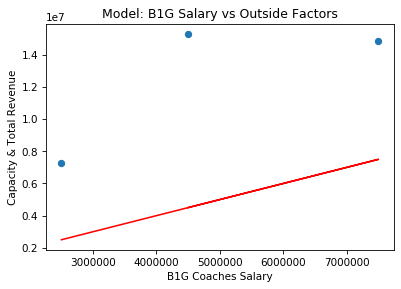

In [50]:
#plot my model

B1GX2_test = sm.add_constant(B1GX2_test)

B1Gy2_preds = results2.predict(B1GX2_test)

plt.figure(dpi = 75)
plt.scatter(B1Gy2_test, B1Gy2_preds)
plt.plot(B1Gy2_test, B1Gy2_test, color="red")
plt.xlabel("B1G Coaches Salary")
plt.ylabel("Capacity & Total Revenue")
plt.title("Model: B1G Salary vs Outside Factors")
plt.show()


In [48]:
#BigTen Model


#remove unecessary columns first

B1G = B1G.drop("TicketSales", axis=1)
B1G = B1G.drop("Contributions", axis=1)
B1G = B1G.drop("Rights/Licensing", axis=1)


B1GY=B1G["SchoolPay"]
B1GX=B1G[[ "Record", "Differential","Capacity","AvgTemp","TotalRevenue","GSR","FGR"]]


B1GX_train, B1GX_test, B1Gy_train, B1Gy_test = train_test_split(B1GX, B1GY, test_size = 0.2, random_state = 300) 

print('Training Data Count: {}'.format(B1GX_train.shape[0]))
print('Testing Data Count: {}'.format(B1GX_test.shape[0]))


B1GX_train = sm.add_constant(B1GX_train)
B1Gresults = sm.OLS(B1Gy_train, B1GX_train).fit()
B1Gresults.summary()





Training Data Count: 10
Testing Data Count: 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SchoolPay   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     3.214
Date:                Sat, 25 Jul 2020   Prob (F-statistic):              0.258
Time:                        16:11:51   Log-Likelihood:                -143.28
No. Observations:                  10   AIC:                             302.6
Df Residuals:                       2   BIC:                             305.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.249e+07    1.5e+07      3.507      0.073   -1.19e+07    1.17e+08
Record        6.731e+06   7.35e+06      0.915      0.457   -2.49e+07    3.84e+07
Differential -1958.7736   8075.929     -0.243      0.831   -3.67e+04    3.28e+04
Capacity       133.8281     40.228      3.327      0.080     -39.257     306.913
AvgTemp      -1.635e+05   1.69e+05     -0.967      0.436   -8.91e+05    5.64e+05
TotalRevenue    -0.1366      0.045     -3.054      0.093      -0.329       0.056
GSR          -8.983e+05   3.93e+05     -2.287      0.149   -2.59e+06    7.92e+05
FGR           6.183e+05   3.04e+05      2.031      0.179   -6.91e+05    1.93e+06
==============================================================================
Omnibus:                        0.154   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.926   Jarque-Bera (JB):                0.101
Skew:                           0.108   Prob(JB):                        0.951
Kurtosis:                       2.558   Cond. No.                     7.19e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#drop the insignifcant variabels from the model and try again

B1GX2=B1G[["Capacity","TotalRevenue"]]
B1GX2_train, B1GX2_test, B1Gy2_train, B1Gy2_test = train_test_split(B1GX2, B1GY, test_size = 0.2, random_state = 465)

print('Training Data Count:', B1GX2_train.shape[0])
print('Testing Data Count::', B1GX2_test.shape[0])

B1GX2_train = sm.add_constant(B1GX2_train)

B1Gresults2 = sm.OLS(B1Gy2_train, B1GX2_train).fit()
B1Gresults2.summary()


Training Data Count: 10
Testing Data Count:: 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SchoolPay   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     2.360
Date:                Sat, 25 Jul 2020   Prob (F-statistic):              0.165
Time:                        16:12:06   Log-Likelihood:                -152.88
No. Observations:                  10   AIC:                             311.8
Df Residuals:                       7   BIC:                             312.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.248e+06   2.96e+06      1.434      0.195   -2.76e+06    1.13e+07
Capacity        93.3897     48.554      1.923      0.096     -21.422     208.201
TotalRevenue    -0.0495      0.041     -1.201      0.269      -0.147       0.048
==============================================================================
Omnibus:                        0.567   Durbin-Watson:                   2.387
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.042
Skew:                           0.141   Prob(JB):                        0.979
Kurtosis:                       2.856   Cond. No.                     9.84e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

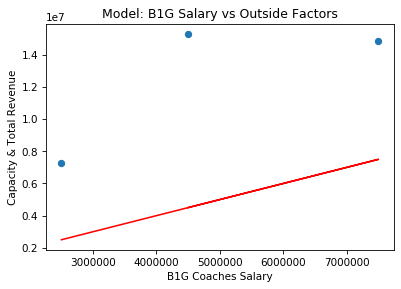

In [52]:
#plot my model

B1GX2_test = sm.add_constant(B1GX2_test)

B1Gy2_preds = results2.predict(B1GX2_test)

plt.figure(dpi = 75)
plt.scatter(B1Gy2_test, B1Gy2_preds)
plt.plot(B1Gy2_test, B1Gy2_test, color="red")
plt.xlabel("B1G Coaches Salary")
plt.ylabel("Capacity & Total Revenue")
plt.title("Model: B1G Salary vs Outside Factors")
plt.show()
